<a href="https://colab.research.google.com/github/Diana9908/TP547/blob/main/FSK/FSK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

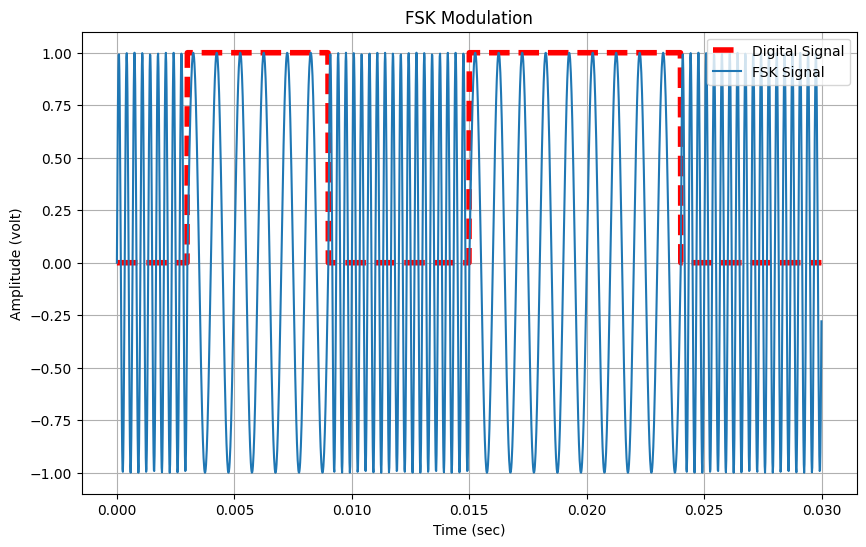

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
fc = 2000  # Frequência central (Hz)
fd = 1000  # Desvio de frequência (Hz)
Tb = 0.003  # Duração de um bit (segundos)
num_bits = 10  # Número de bits
samples_per_bit = 200  # Amostras por bit
total_samples = samples_per_bit * num_bits  # Total de amostras

# Vetor de tempo relativo a um bit
t1 = np.linspace(0, Tb, samples_per_bit, endpoint=False)

# Sequência de bits aleatórios
data = (np.random.rand(num_bits) > 0.5)
data_sequence = np.repeat(data, samples_per_bit)

# Sinal FSK
fsk = np.zeros(total_samples)
for i, bit in enumerate(data):
    start = i * samples_per_bit
    end = start + samples_per_bit
    if bit == 1:
        fsk[start:end] = np.sin(2 * np.pi * (fc - fd) * t1)
    else:
        fsk[start:end] = np.sin(2 * np.pi * (fc + fd) * t1)

# Vetor de tempo total
t = np.zeros(total_samples)
for i in range(num_bits):
    start = i * samples_per_bit
    end = start + samples_per_bit
    t[start:end] = t1 + i * Tb

plt.figure(figsize=(10, 6))
plt.plot(t, data_sequence, linestyle='--', color='r', linewidth=4, label='Digital Signal')
plt.plot(t, fsk, label='FSK Signal')
plt.grid(True)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (volt)')
plt.title('FSK Modulation')
plt.legend()
plt.show()